In [1]:
!pip install plotly

In [2]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px


# Project tittle: 
# VISUALIZATION AND PREDICTION OF COST OF MEDICAL INSURANCE
 #### data source: https://www.kaggle.com/mirichoi0218/insurance

In [3]:
# import important liberies
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

first, we would load up the data, which was obtained from kaggle

In [4]:
#load the data set
medic_insure_data=pd.read_csv('medical_insurance.csv')
medic_insure_data.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


shown above is the first ten entries of the data sets. next we check for missing values.

In [5]:
#check for missing values
medic_insure_data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

#### so there are no missing values in the data sets above

In [6]:
#describe the data
medic_insure_data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


##### by plotting a correlation heatmap, we get the features which with the strongest and weakest relationship witht the amount of the medical isurance.

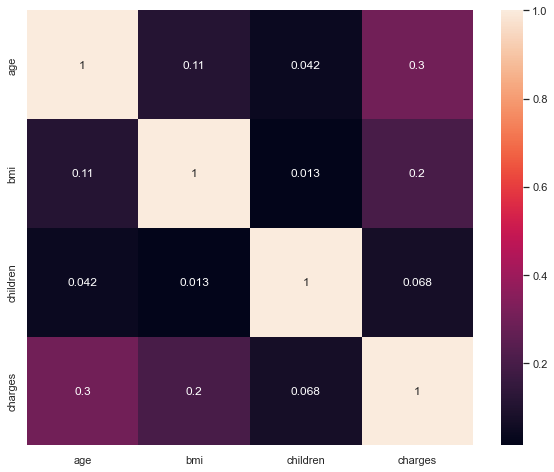

In [33]:
sns.heatmap(medic_insure_data.corr(), annot=True)
sns.set(rc={"figure.figsize":(10, 12)})

the y-variable which we will be predicting as it were, is the charge of the medicalcost and that is what we are trying to predict(Y_varaible). all other varaible are classed as our X_varaible(region,sex,age,children,and BMI).

However, from the correlation heatmap above, age and BMI has the strongest correlation with the charge of the medical insurance.

[Text(0.5, 1.0, 'Distribution of BMI among gender')]

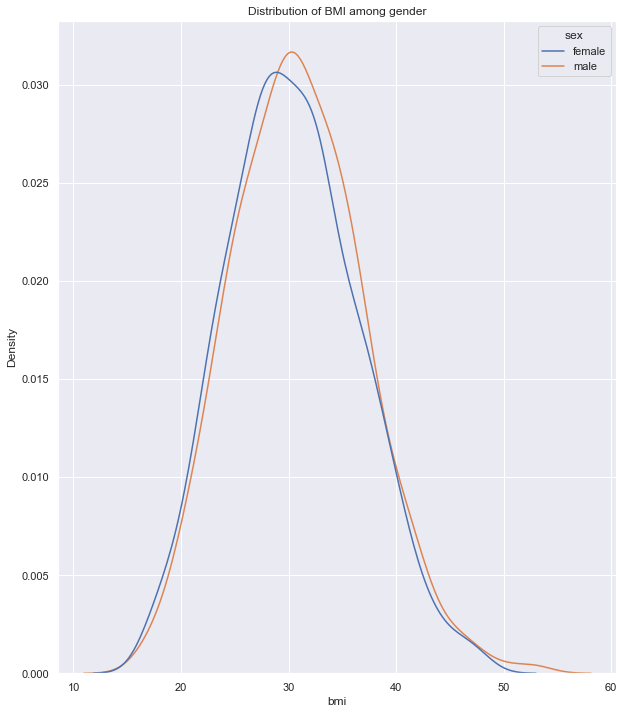

In [37]:
sns.kdeplot(data=medic_insure_data, x="bmi", hue='sex', color='c').set(title='Distribution of BMI among gender')


[Text(0.5, 1.0, 'Distribution of medical charges among genders')]

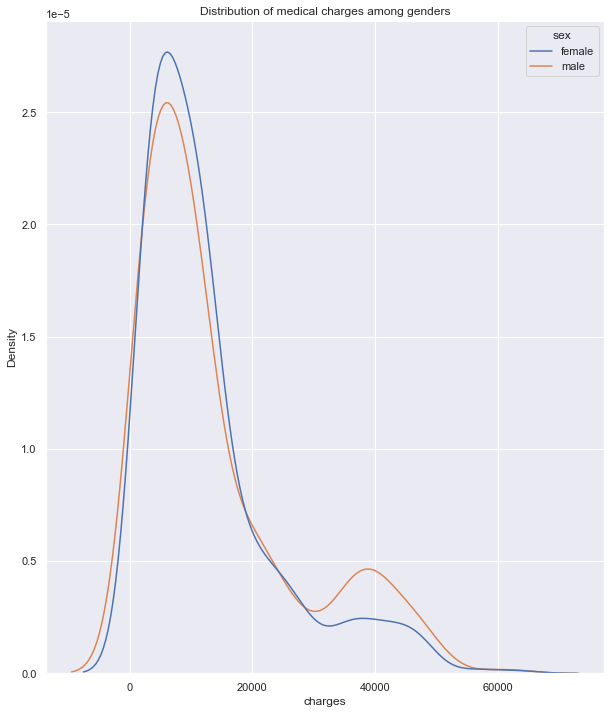

In [38]:
sns.kdeplot(data=medic_insure_data, x="charges", hue="sex", color='c').set(title='Distribution of medical charges among genders')

[Text(0.5, 1.0, 'Distribution of age among gender')]

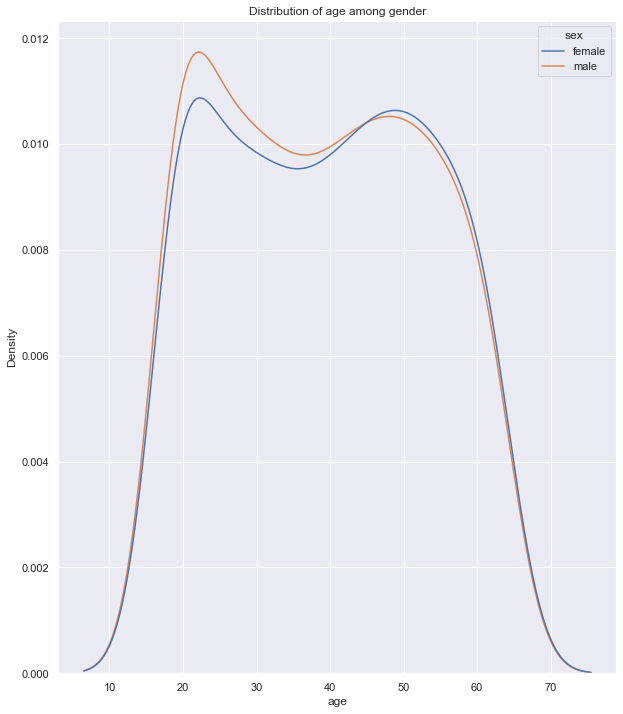

In [41]:
sns.kdeplot(data=medic_insure_data, x="age", hue="sex", color='c').set(title='Distribution of age among gender')

the density plots gives us more insights into the distribution of information available from the data. On the average, males had higher values for BMI compared to females. Even though the medical insurance cost more for the females than the males, the age age distribution shows that the females have a lower age distribution.

<AxesSubplot:xlabel='region', ylabel='count'>

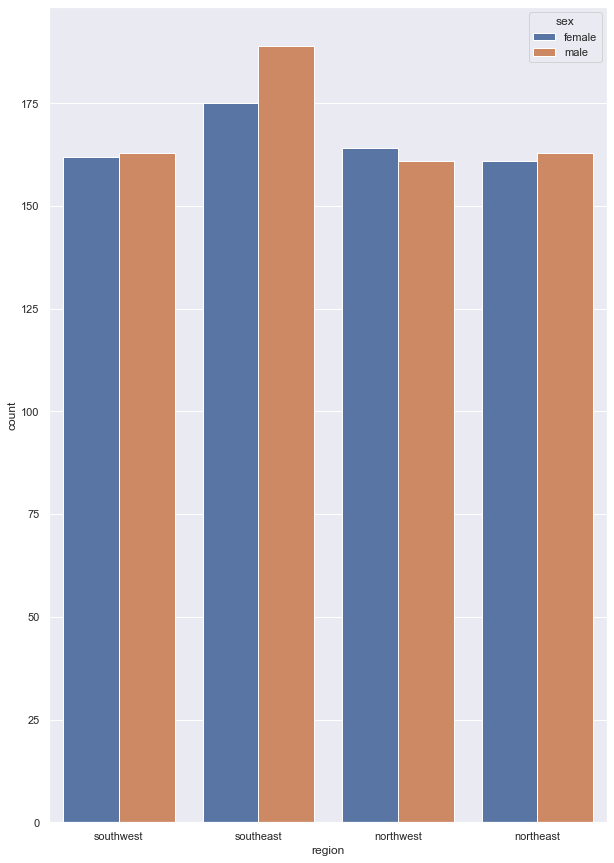

In [11]:
sns.countplot(x="region", hue="sex", data=medic_insure_data)

the ratio of male and female is almost the same through out the regions except the southeast region where the difference in the number of males and females is very considerable. 

<AxesSubplot:xlabel='region', ylabel='count'>

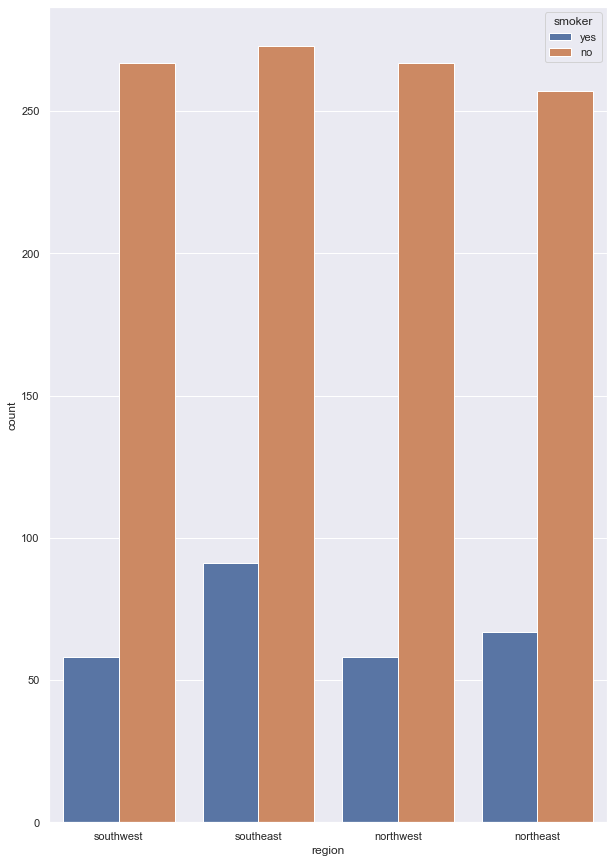

In [13]:
sns.countplot(x="region", hue="smoker", data=medic_insure_data)

in all regions, the number of non smokers outweighs the number of smokers. in otherwords, smoking is may not be the only factor that affect medical conditions that affect the charges on the medical  of the patients.

In [43]:
# plot bar  using keyword arguments.
fig = px.bar(medic_insure_data, x='age', y='charges',#  DataFrame or array-like or dict
             hover_data=['smoker', 'children', 'sex', 'bmi'], 
             color='children',
             labels={'pop':'medical insurance cost'},  #By default, column names are used in the figure for axis titles,
             height=400)
#show figure
fig.show()

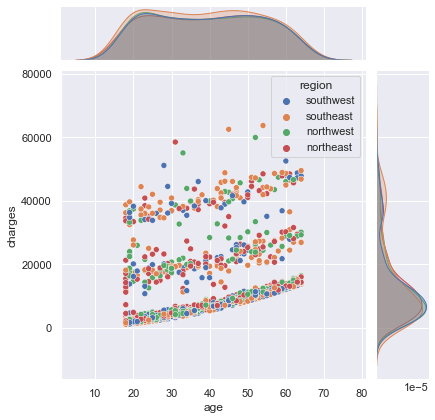

In [47]:
sns.jointplot(data=medic_insure_data, x="age", y="charges", hue='region')
sns.set(rc={"figure.figsize":(20, 30)})

Across all the regions, the charges on the medical isurance increases with the age of the patients, as shown in the jointplot above.

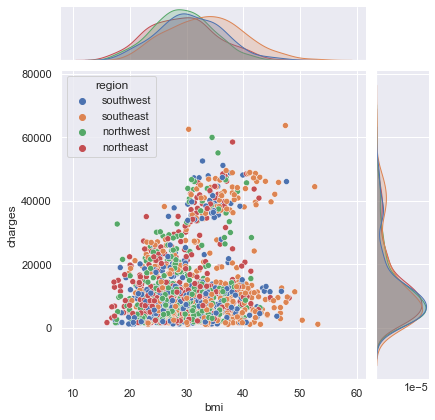

In [44]:
sns.jointplot(data=medic_insure_data, x="bmi", y="charges", hue='region')
sns.set(rc={"figure.figsize":(15, 20)})

across all regions, as the BMI increases, the medical charges also increases

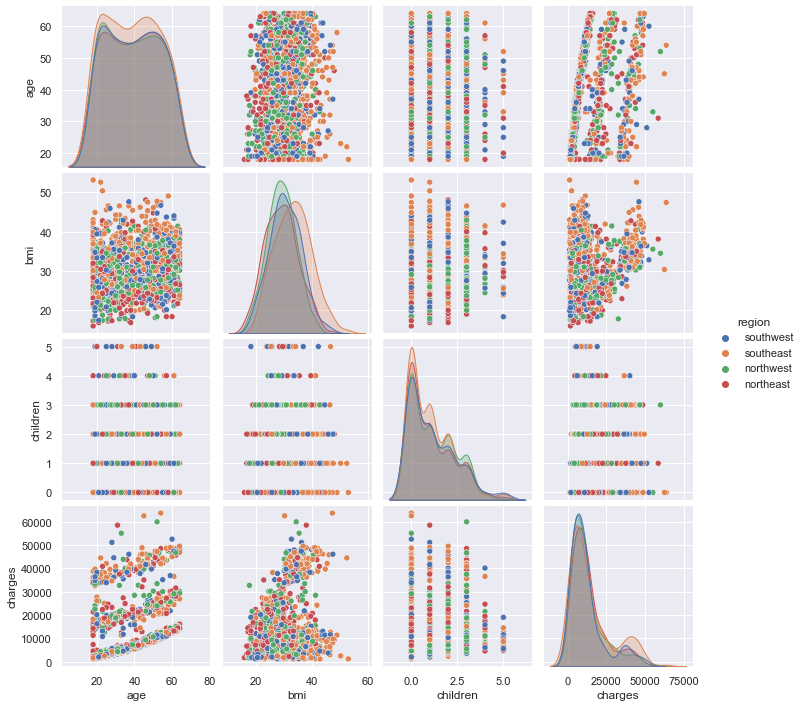

In [45]:
sns.pairplot(medic_insure_data, hue="region")

# PREDICTION OF CHARGES

#### defining the x and y variable 

In [17]:
#X_insurance = medical_insurance_dataset.iloc[:,0:6].values

X_value=medic_insure_data.iloc[:,0:6].values
X_value

array([[19, 'female', 27.9, 0, 'yes', 'southwest'],
       [18, 'male', 33.77, 1, 'no', 'southeast'],
       [28, 'male', 33.0, 3, 'no', 'southeast'],
       ...,
       [18, 'female', 36.85, 0, 'no', 'southeast'],
       [21, 'female', 25.8, 0, 'no', 'southwest'],
       [61, 'female', 29.07, 0, 'yes', 'northwest']], dtype=object)

the X_values are asigned for all other features aprt from the charges, starting from the first column (0) to the column before the last(6) which is the region. while the Y_value is assigned for the charges.

As can be seen, the Y_value is entirely numeric and are arraged as an array. this was not the case with the X_values which were combinations of numerical and categorical features.

In [18]:
Y_value=medic_insure_data.iloc[:,6].values
Y_value

array([16884.924 ,  1725.5523,  4449.462 , ...,  1629.8335,  2007.945 ,
       29141.3603])

## Lable Encoding

the categorical features in the X_values will have to encoded in order for them to be useful in the model for prediction. to do this we emply the use of sklearn lable enconder.

After we import labelencoder, we encode 'sex'. 'region', and 'smoker'

In [19]:
from sklearn.preprocessing import LabelEncoder

In [20]:
label_encoder_sex = LabelEncoder()
label_encoder_smoker = LabelEncoder()
label_encoder_region = LabelEncoder()

In [21]:
X_value[:,1] = label_encoder_sex.fit_transform(X_value[:,1])
X_value[:,4] = label_encoder_smoker.fit_transform(X_value[:,4])
X_value[:,5] = label_encoder_region.fit_transform(X_value[:,5])

X_value

array([[19, 0, 27.9, 0, 1, 3],
       [18, 1, 33.77, 1, 0, 2],
       [28, 1, 33.0, 3, 0, 2],
       ...,
       [18, 0, 36.85, 0, 0, 2],
       [21, 0, 25.8, 0, 0, 3],
       [61, 0, 29.07, 0, 1, 1]], dtype=object)

## Split data set into train and test sets

here we must first split our data into train(to train the model) and test(to validate) the model. to do thiswe must first import from sklearn.model_selection the train_test_split

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
X_value_train, X_value_test, Y_value_train, Y_value_test = train_test_split(X_value, Y_value, test_size = 0.20, random_state = 0)

Now, 80%(0.80) of the data is used to train the model, while 20%(0.20) is used to validate the model

In [24]:
X_value_train.shape, Y_value_train.shape

((1070, 6), (1070,))

###### 1070 entries are used to train the model

In [25]:
X_value_test.shape, Y_value_test.shape

((268, 6), (268,))

#### 268 features are used to test or validate the model

## USING THE MACHINE LEARNING ALGORITHM (Random_Forest) 

In [26]:
from sklearn.ensemble import RandomForestRegressor

In [27]:
# _rd_()
medicalcost_rd_regressor = RandomForestRegressor(n_estimators=100)

In [49]:
medicalcost_rd_regressor.fit(X_value_train, Y_value_train)

RandomForestRegressor()

from the imported RandomForestRegressor, the number of trees we want to build before taking the maximum voting or averages of predictions is 100 (n_estimators=100). Thereafter we fit the model to our data.

In [29]:
medicalcost_rd_regressor.score(X_value_train,Y_value_train)

0.9739888203281241

The accuracy of the trained model is 0.97.4%

In [30]:
predictions = medicalcost_rd_regressor.predict(X_value_test)

In [31]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(Y_value_test, predictions)

2673.2170350435313

The predicted value for the charges using the model is $2,673.21